In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('G:\Data Analysis\Encryptix Data Science Internship\Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [129]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
import warnings
warnings.filterwarnings('ignore')

In [131]:
# Filling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns='Cabin', inplace=True)

In [132]:
# Removing duplicates
df.drop_duplicates(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [133]:
# Converting categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [134]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


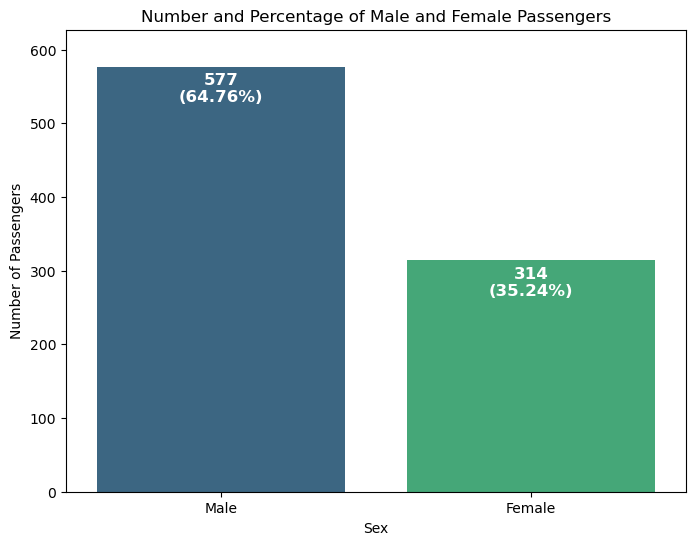

In [135]:

# Calculate the number and percentage of male and female passengers
gender_counts = df['Sex'].value_counts()
gender_percentages = df['Sex'].value_counts(normalize=True) * 100

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis', ax=ax)

# Add text annotations inside the bars
for i, count in enumerate(gender_counts.values):
    ax.text(i, count - 30, f'{count}\n({gender_percentages.values[i]:.2f}%)', ha='center', va='center', fontsize=12, color='white', weight='bold')

# Set the labels and title
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])
ax.set_ylabel('Number of Passengers')
ax.set_title('Number and Percentage of Male and Female Passengers')

plt.ylim(0, gender_counts.max() + 50)  # Adjust y-axis limit to ensure text fits within the bars

plt.show()


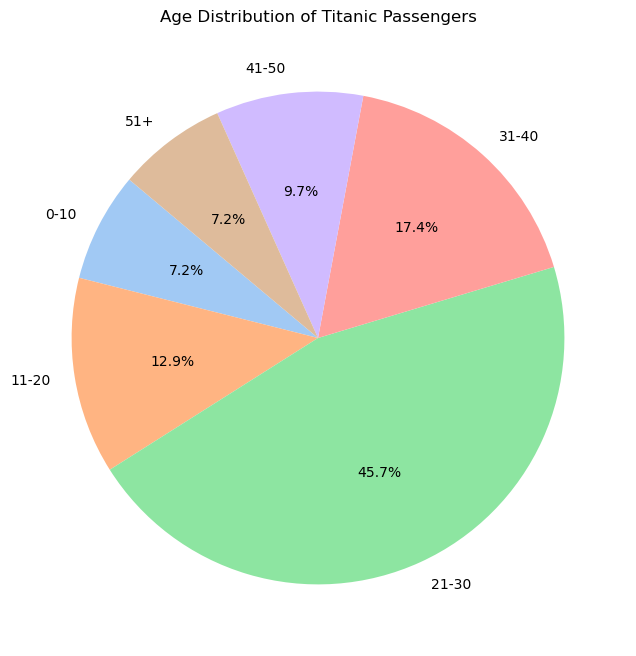

In [136]:
# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']

# Categorize ages into bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate the number of passengers in each age group
age_group_counts = df['AgeGroup'].value_counts().sort_index()

# Plotting the pie chart
plt.figure(figsize=(58,8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel')[0:9])

# Adding a title
plt.title('Age Distribution of Titanic Passengers')

# Show plot
plt.show()

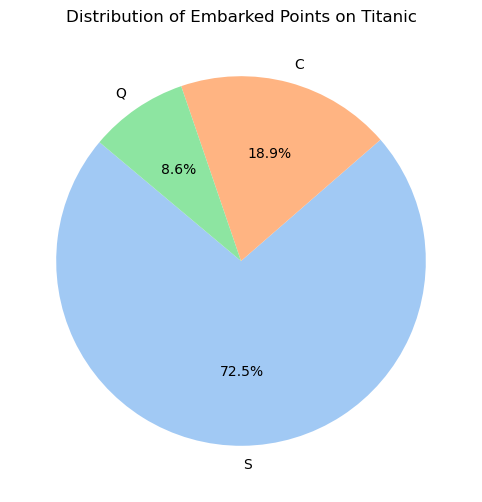

In [137]:
embarked_counts = df['Embarked'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel')[0:3])

# Adding a title
plt.title('Distribution of Embarked Points on Titanic')

# Show plot
plt.show()

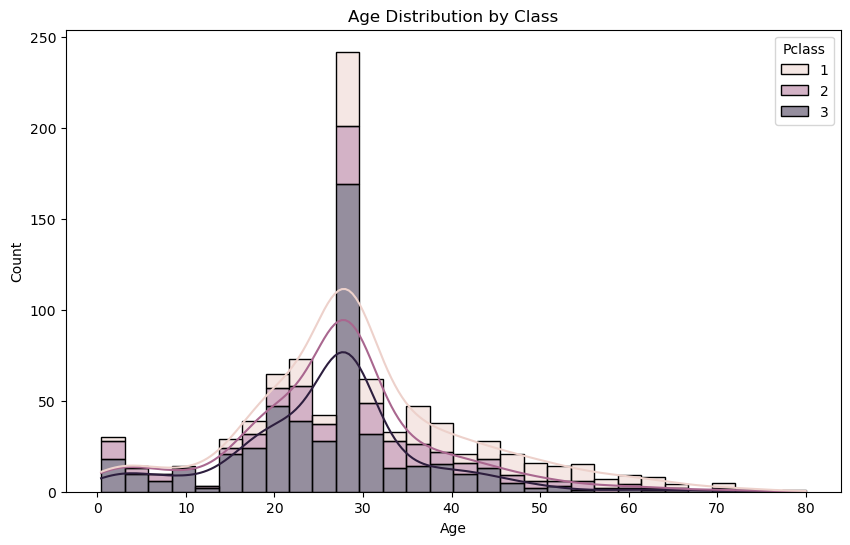

In [138]:
# Age distribution by class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', kde=True)
plt.title('Age Distribution by Class')
plt.show()

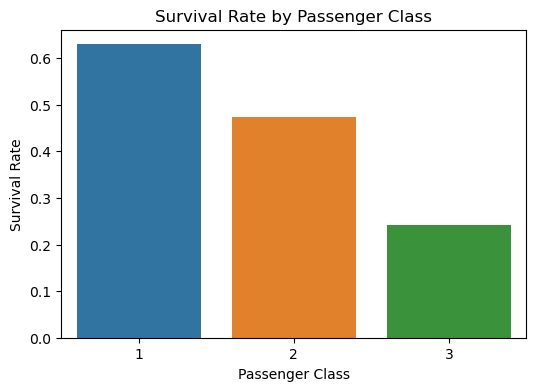

In [139]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

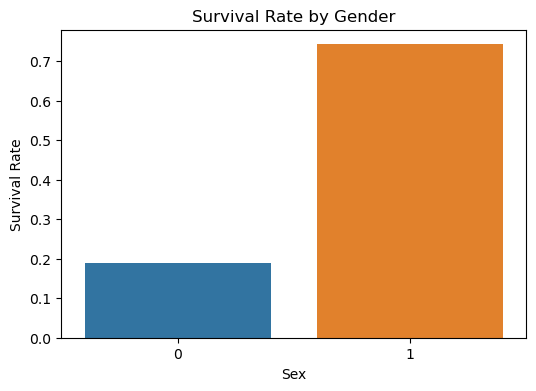

In [140]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Maximum Number of Females Were Survived

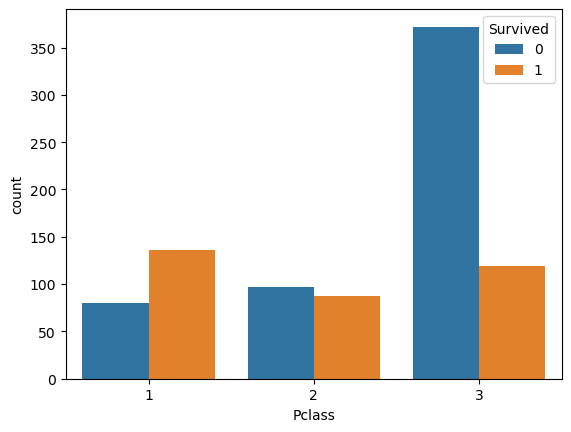

In [145]:
sns.countplot(data=df,x='Pclass', hue='Survived');

## Maximum people from 1st class were saved hence minimum amongst them died and maximum people from 3rd class died hence minimum amongst them were saved

In [147]:
x= df[['Pclass','Age','Sex']]
y=df['Survived']

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [150]:
x_train.shape

(668, 3)

In [151]:
y_train.shape

(668,)

In [152]:
x_test.shape

(223, 3)

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dt=DecisionTreeClassifier(random_state=0)

In [156]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [157]:
y_pred= dt.predict(x_test)

In [158]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [159]:
res=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [160]:
res

,Actual,Predicted
495,0,0
648,0,0
278,0,1
31,1,1
255,1,1
...,...,...
167,0,0
306,1,1
379,0,0
742,1,1


In [161]:
from sklearn.metrics import ConfusionMatrixDisplay

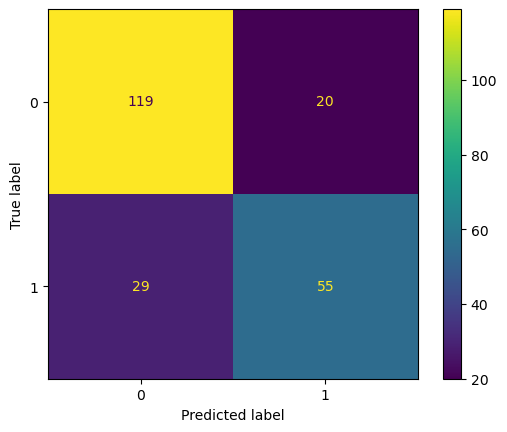

In [162]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [163]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       139
           1       0.73      0.65      0.69        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



In [165]:
from sklearn.metrics import accuracy_score

In [166]:
accuracy_score(y_test,y_pred)

0.7802690582959642

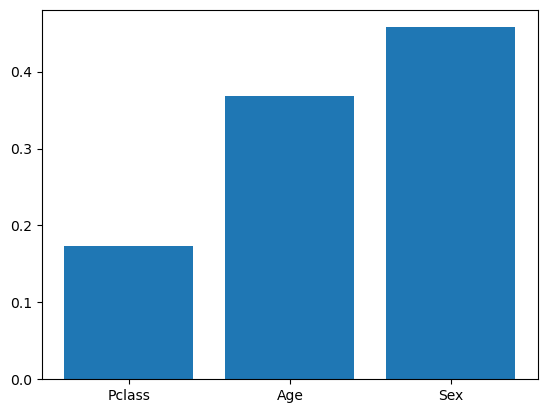

In [167]:
plt.bar(x.columns,dt.feature_importances_); 

### The importance of columns can be derived from the above graph for predicting output values 

### Gender column has the highest importance and passenger class column has the least importance as compared to others